# Statapp

Les imports

In [1]:
import numpy as np
from json import loads
import matplotlib.pyplot as plt
import pandas as pd
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error as mse
from random import randint
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, pacf, acf



where = '/Users/IcloudElliott/Desktop/ENSAE/2A/STATAPP/velib_2780.csv'
velib = pd.read_csv(where, sep=';')

def rmse(X,Y):
    return(mse(X,Y,squared = False))


Bad key text.latex.unicode in file /Users/IcloudElliott/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /Users/IcloudElliott/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key nbagg.transparent in file /Users/IcloudElliott/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 426 ('nbagg.transparent: True')
You probably need to get an updated ma

On créé la série sur laquelle on va travailler

In [87]:
station = velib.iloc[1][1:]

def dico(jour):
    if isinstance(jour,str):
        dia = '{' + jour[1:-1].replace('{','').replace('}','').replace("'",'"') + '}'
        return(loads(dia))
    else:
        return(jour)

def total(j):
    mech = j['mechanical']
    eb = j['ebike']
    return(mech + eb)

der=0
for i in station.index:
    if station[i] == '[{}, {}]':
        station[i] = station[der]
        #print(i)
    else:
        station[i] = total(dico(station[i]))
    der=i
station = station.reindex(pd.to_datetime(station.index))

rentree = 21575
vacances = 32500
work = station[rentree:vacances]


On subsample heure par heure

In [64]:
start = pd.to_datetime('2021-01-04 01:00:00')
end =  pd.to_datetime('2021-02-12 20:00:00')
h = start
hourindex = pd.date_range(start=start
, end=end, freq='H')

w_hour = pd.DataFrame(index = hourindex)
velhour = []
t = 0
while h <= end :
    temp = []
    while work.index[t] < h :
        temp.append(work[t])
        if t < 10924:
            t += 1
        else:
            break
    #print(temp)
    velhour.append(np.median(temp))
    h += pd.to_timedelta('1H')

w_hour["vel"] = velhour
w_hour.tail()

,vel
2021-02-12 16:00:00,24.0
2021-02-12 17:00:00,27.0
2021-02-12 18:00:00,25.0
2021-02-12 19:00:00,26.0
2021-02-12 20:00:00,25.0


La frise

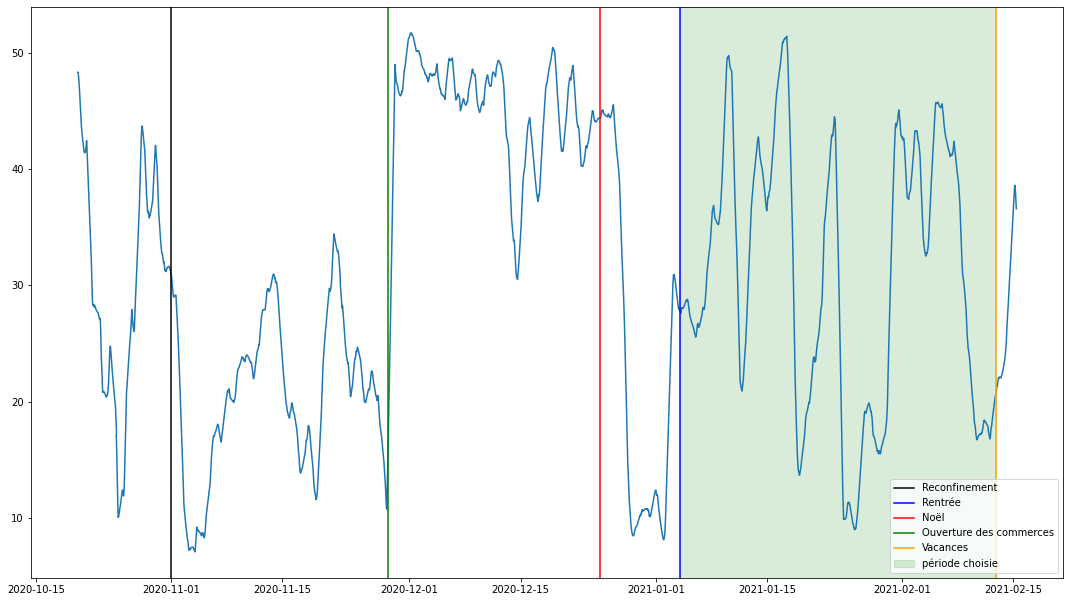

In [78]:
fig, ax = plt.subplots()
Noel = pd.to_datetime('2020-12-25')
Rentree = pd.to_datetime('2021-01-4')
Commerce = pd.to_datetime('2020-11-28 08:00')
ax.plot(sta.rolling(288,center = True).mean(),)
ax.axvline(pd.to_datetime('2020-11-01'), c='black',label = 'Reconfinement')
ax.axvline(Rentree, c='blue',label = 'Rentrée')
ax.axvline(Noel, c='red',label = 'Noël')
ax.axvline(Commerce, c='green', label = 'Ouverture des commerces')
ax.axvline(end, c='orange', label = 'Vacances')
ax.axvspan(start, end, alpha=0.15, color='g',label = 'période choisie')
#ax.axvspan(Noel, Rentree, alpha=0.15, color='r',label = 'Vacances de Noel Semaine 2')

fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.show()


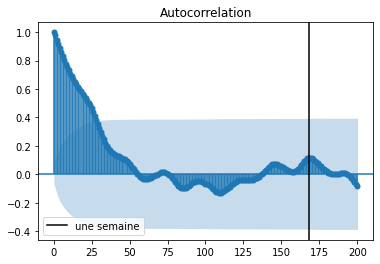

In [108]:
D=744 #1 mois
train = w_hour[:D]
test = w_hour[D:]
plot_acf(train, lags = 200)
plt.axvline(168, c='black', label = 'une semaine')
plt.legend()
plt.show()

In [11]:
stepwise_fit = pm.auto_arima(train, start_p=0, start_q=0, max_p=2, max_q=2, m=24, start_P=0, 
                             seasonal=True, trace=True, d=1, D=0,
error_action='ignore',  # don't want to know if an order does not work
    suppress_warnings=True,  # don't want convergence warnings
    stepwise=True)  # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,1)[24] intercept   : AIC=3592.566, Time=0.92 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=3600.757, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=3576.848, Time=1.01 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=3576.408, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=3598.763, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[24] intercept   : AIC=3582.533, Time=0.13 sec
 ARIMA(0,1,1)(1,0,1)[24] intercept   : AIC=inf, Time=4.44 sec
 ARIMA(0,1,1)(0,0,2)[24] intercept   : AIC=3577.962, Time=4.91 sec
 ARIMA(0,1,1)(1,0,0)[24] intercept   : AIC=3576.005, Time=0.81 sec
 ARIMA(0,1,1)(2,0,0)[24] intercept   : AIC=3577.627, Time=4.52 sec
 ARIMA(0,1,1)(2,0,1)[24] intercept   : AIC=inf, Time=19.32 sec
 ARIMA(0,1,0)(1,0,0)[24] intercept   : AIC=3591.930, Time=0.76 sec
 ARIMA(1,1,1)(1,0,0)[24] intercept   : AIC=3577.412, Time=1.81 sec
 ARIMA(0,1,2)(1,0,0)[24] intercept   : AIC=3577.764, Time=1.21 sec
 ARIMA(1,1,2)(1,0,0)[24] int

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  744
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 24)   Log Likelihood               -1784.003
Date:                             Tue, 06 Apr 2021   AIC                           3574.007
Time:                                     20:39:34   BIC                           3587.839
Sample:                                          0   HQIC                          3579.339
                                             - 744                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1596      0.029      5.503      0.000       0.103       0.216
ar.S.L24       0.1096      0.040      2.737      0.006       0.031       0.188
sigma2         7.1268      0.144     49.650      0.000       6.845       7.408
===================================================================================
Ljung-Box (Q):                       41.46   Jarque-Bera (JB):              8892.71
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

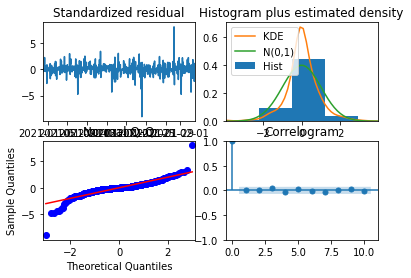

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 vel   No. Observations:                  744
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 24)   Log Likelihood               -1781.583
Date:                             Tue, 06 Apr 2021   AIC                           3573.166
Time:                                     20:47:03   BIC                           3596.227
Sample:                                 01-04-2021   HQIC                          3582.055
                                      - 02-04-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9047      0.339      2.668      0.008       0.240       1.569
ar.L1          0.9666      0.011     88.797      0.000       0.945       0.988
ma.L1          0.1732      0.031      5.571      0.000       0.112       0.234
ar.S.L24       0.1153      0.041      2.806      0.005       0.035       0.196
sigma2         7.0051      0.156     45.039      0.000       6.700       7.310
===================================================================================
Ljung-Box (Q):                       38.42   Jarque-Bera (JB):              8757.37
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                            -0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
model = SARIMAX(train, order=(1,0,1),seasonal_order = (1,0,0,24),trend = 'c')
mod_fit = model.fit(disp=False)
mod_fit.plot_diagnostics()
plt.show()
mod_fit.summary()

In [19]:
D = 760
F = 24
train = w_hour[D - 744:D]
test = w_hour[D:]
model = SARIMAX(train, order=(1,0,1), seasonal_order = (1,0,0,24), trend = 'c')
mod_fit = model.fit(disp=False)
forcima = []
real = test[:F]

forcdumb = train[-1:].append(test[:F-1])

for i in range(F):
    forcima.append(mod_fit.forecast())
    mod_fit = mod_fit.append(test[i:i+1])

print("dumb:", rmse(real,forcdumb))
print("arima:", rmse(real,forcima))

dumb: 1.758905909933786
arima 1.8007641864713404


dumb: 6.268749999999999 arima: 6.532124289532007


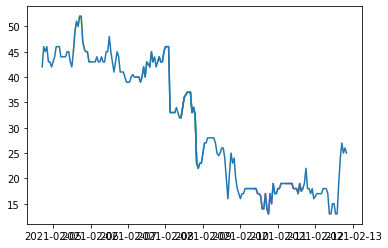

([14.75,
  0.625,
  9.916666666666666,
  0.7083333333333334,
  5.083333333333333,
  9.916666666666666,
  3.5416666666666665,
  2.7083333333333335,
  5.458333333333333,
  9.979166666666666],
 [14.876050110361314,
  0.8733648564416301,
  9.900472564148798,
  0.9860472421977525,
  6.78001618607859,
  9.837763557302344,
  4.350229892101046,
  3.2001729280387483,
  4.769624943484796,
  9.74750061516505])

In [23]:
def cross_val(N=10):
    errolast = []
    errorima = []
    for k in range(10):
        D = randint(760,940)
        train = w_hour[D-744:D]
        test = w_hour[D:]
        F = 12
        model = SARIMAX(train, order=(1,0,1), seasonal_order = (1,0,0,24), trend = 'c')
        mod_fit = model.fit(disp=False)
        forcima = []
        real = test[:F]
        forcdumb = train[-1:].append(test[:F-1])
        for i in range(F):
            forcima.append(mod_fit.forecast())
            mod_fit = mod_fit.append(test[i:i+1])
        errolast.append(mse(real, forcdumb))
        errorima.append(mse(real, forcima))
        #plt.plot([0]*k*F+list(real['vel']))
        plt.plot(real)
    print('dumb:', sum(errolast)/N, "arima:", sum(errorima)/N)
    plt.plot(w_hour[760:])
    plt.show()
    return(errolast, errorima)

cross_val()